In [ ]:
# # Import necessary libraries
# from sklearn.datasets import load_digits
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# (a) Load the MNIST subset (digits 0-4)
digits = load_digits()
X1, y1 = digits.data, digits.target

# Filter only the digits 0-4
mask = y1 < 5
X, y = X1[mask], y1[mask]

In [ ]:
# Display basic information about the dataset
print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target shape: {y.shape}")

Dataset shape: (901, 64)
Number of samples: 901
Number of features: 64
Target shape: (901,)


In [ ]:
# 1(b) Normalize the dataset
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
X_normalized = scaler.fit_transform(X)

In [ ]:
# Verify normalization (mean ≈ 0, std ≈ 1)
print(f"\nMean after normalization: {np.mean(X_normalized):.4f}")
print(f"Std after normalization: {np.std(X_normalized):.4f}")


Mean after normalization: -0.0000
Std after normalization: 0.9763


In [ ]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
# Fit and transform the normalized data
X_pca = pca.fit_transform(X_normalized)

In [ ]:
# Check the new shape
print(f"\nShape after PCA: {X_pca.shape}")

# Explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")


Shape after PCA: (901, 2)
Explained variance ratio: [0.17416422 0.11215995]
Total explained variance: 0.2863


In [ ]:
# (c) Save the dataset
dataset_2D = np.column_stack((X_pca, y))

In [ ]:
mnist_dataset_2D = dataset

array([[ 2.5593284 , -4.39784231,  0.        ],
       [-0.06786325,  4.5135017 ,  1.        ],
       [ 0.37492297,  2.34018939,  2.        ],
       ...,
       [ 5.62472909,  1.24548702,  4.        ],
       [ 5.86064397,  1.89091186,  4.        ],
       [ 2.9811664 , -3.8199927 ,  0.        ]])

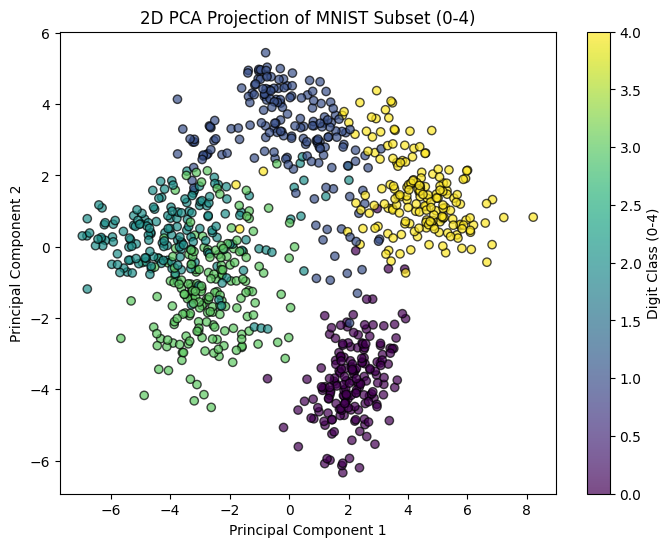

In [ ]:
# Visualize the dataset
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.colorbar(scatter, label="Digit Class (0-4)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection of MNIST Subset (0-4)")
plt.show()

# 2. K-Means Clustering and Comparison



In [ ]:
X_pca, y = dataset_2D["X_pca"], dataset_2D["y_subset"]

In [ ]:
# Import additional required libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 2(a) & 2(b) Train K-Means and get labels (using k=5 initially as there are 5 digits)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

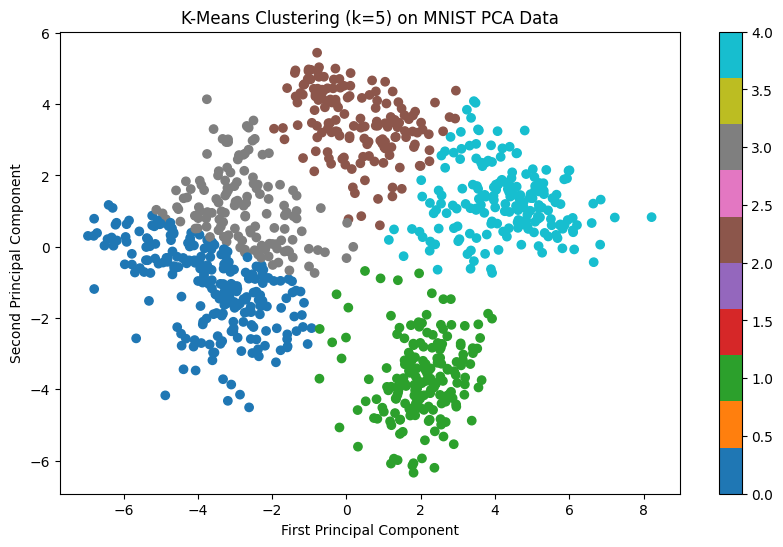

In [ ]:
# 2(c) Visualize the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='tab10')
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering (k=5) on MNIST PCA Data')
plt.show()

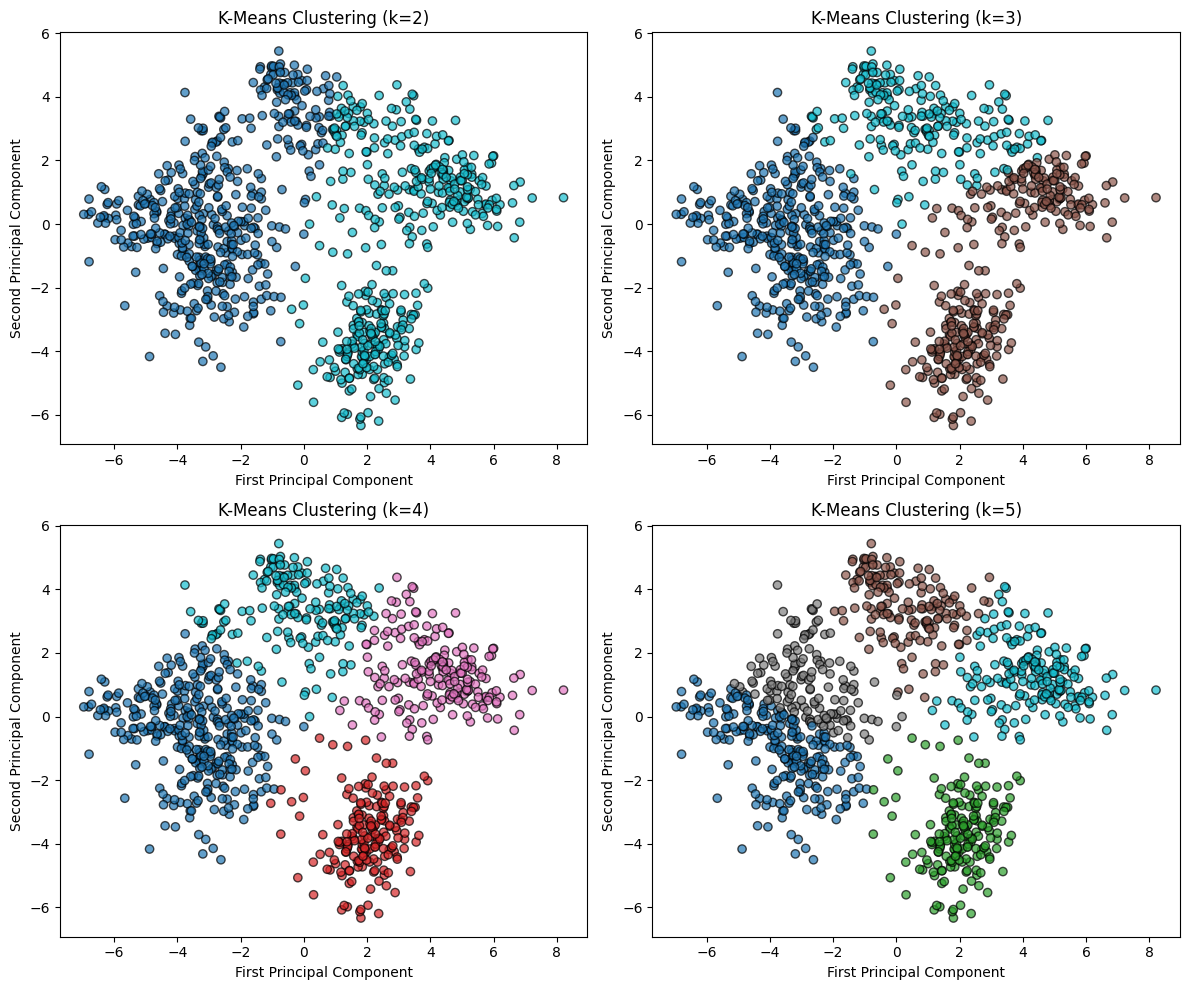

In [ ]:
# Define different values of k
k_values = [2, 3, 4, 5]
inertias = []

# Plot K-Means clustering results for each k
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, max_iter=50, random_state=42)
    kmeans.fit(X_pca)
    cluster_labels = kmeans.labels_
    # Store inertia
    inertias.append(kmeans.inertia_)

    # Scatter plot for each k
    ax = axes[i // 2, i % 2]
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='tab10', edgecolor='k', alpha=0.7)
    ax.set_title(f'K-Means Clustering (k={k})')
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')

# Adjust layout
plt.tight_layout()
plt.show()


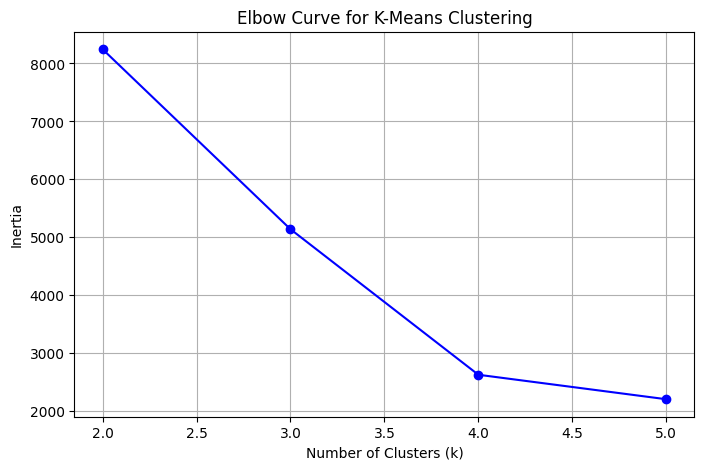

In [ ]:
# 2(f) Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-Means Clustering')
plt.grid(True)
plt.show()

In [ ]:
# Analysis for optimal k
print("Inertia values for different k:")
for k, inertia in zip(k_values, inertias):
    print(f"k = {k}: {inertia:.2f}")

Inertia values for different k:
k = 2: 8245.82
k = 3: 5139.04
k = 4: 2626.57
k = 5: 2204.16


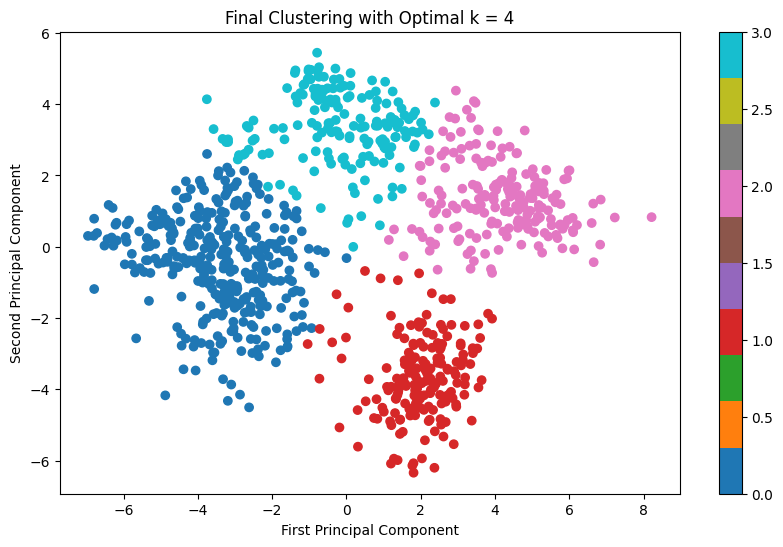

In [ ]:
#Perform clustering with optimal k and visualize
# Based on the elbow curve, let's assume k=3 looks like the elbow point
optimal_k = 4
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(X_pca)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_optimal.labels_, cmap='tab10')
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'Final Clustering with Optimal k = {optimal_k}')
plt.show()

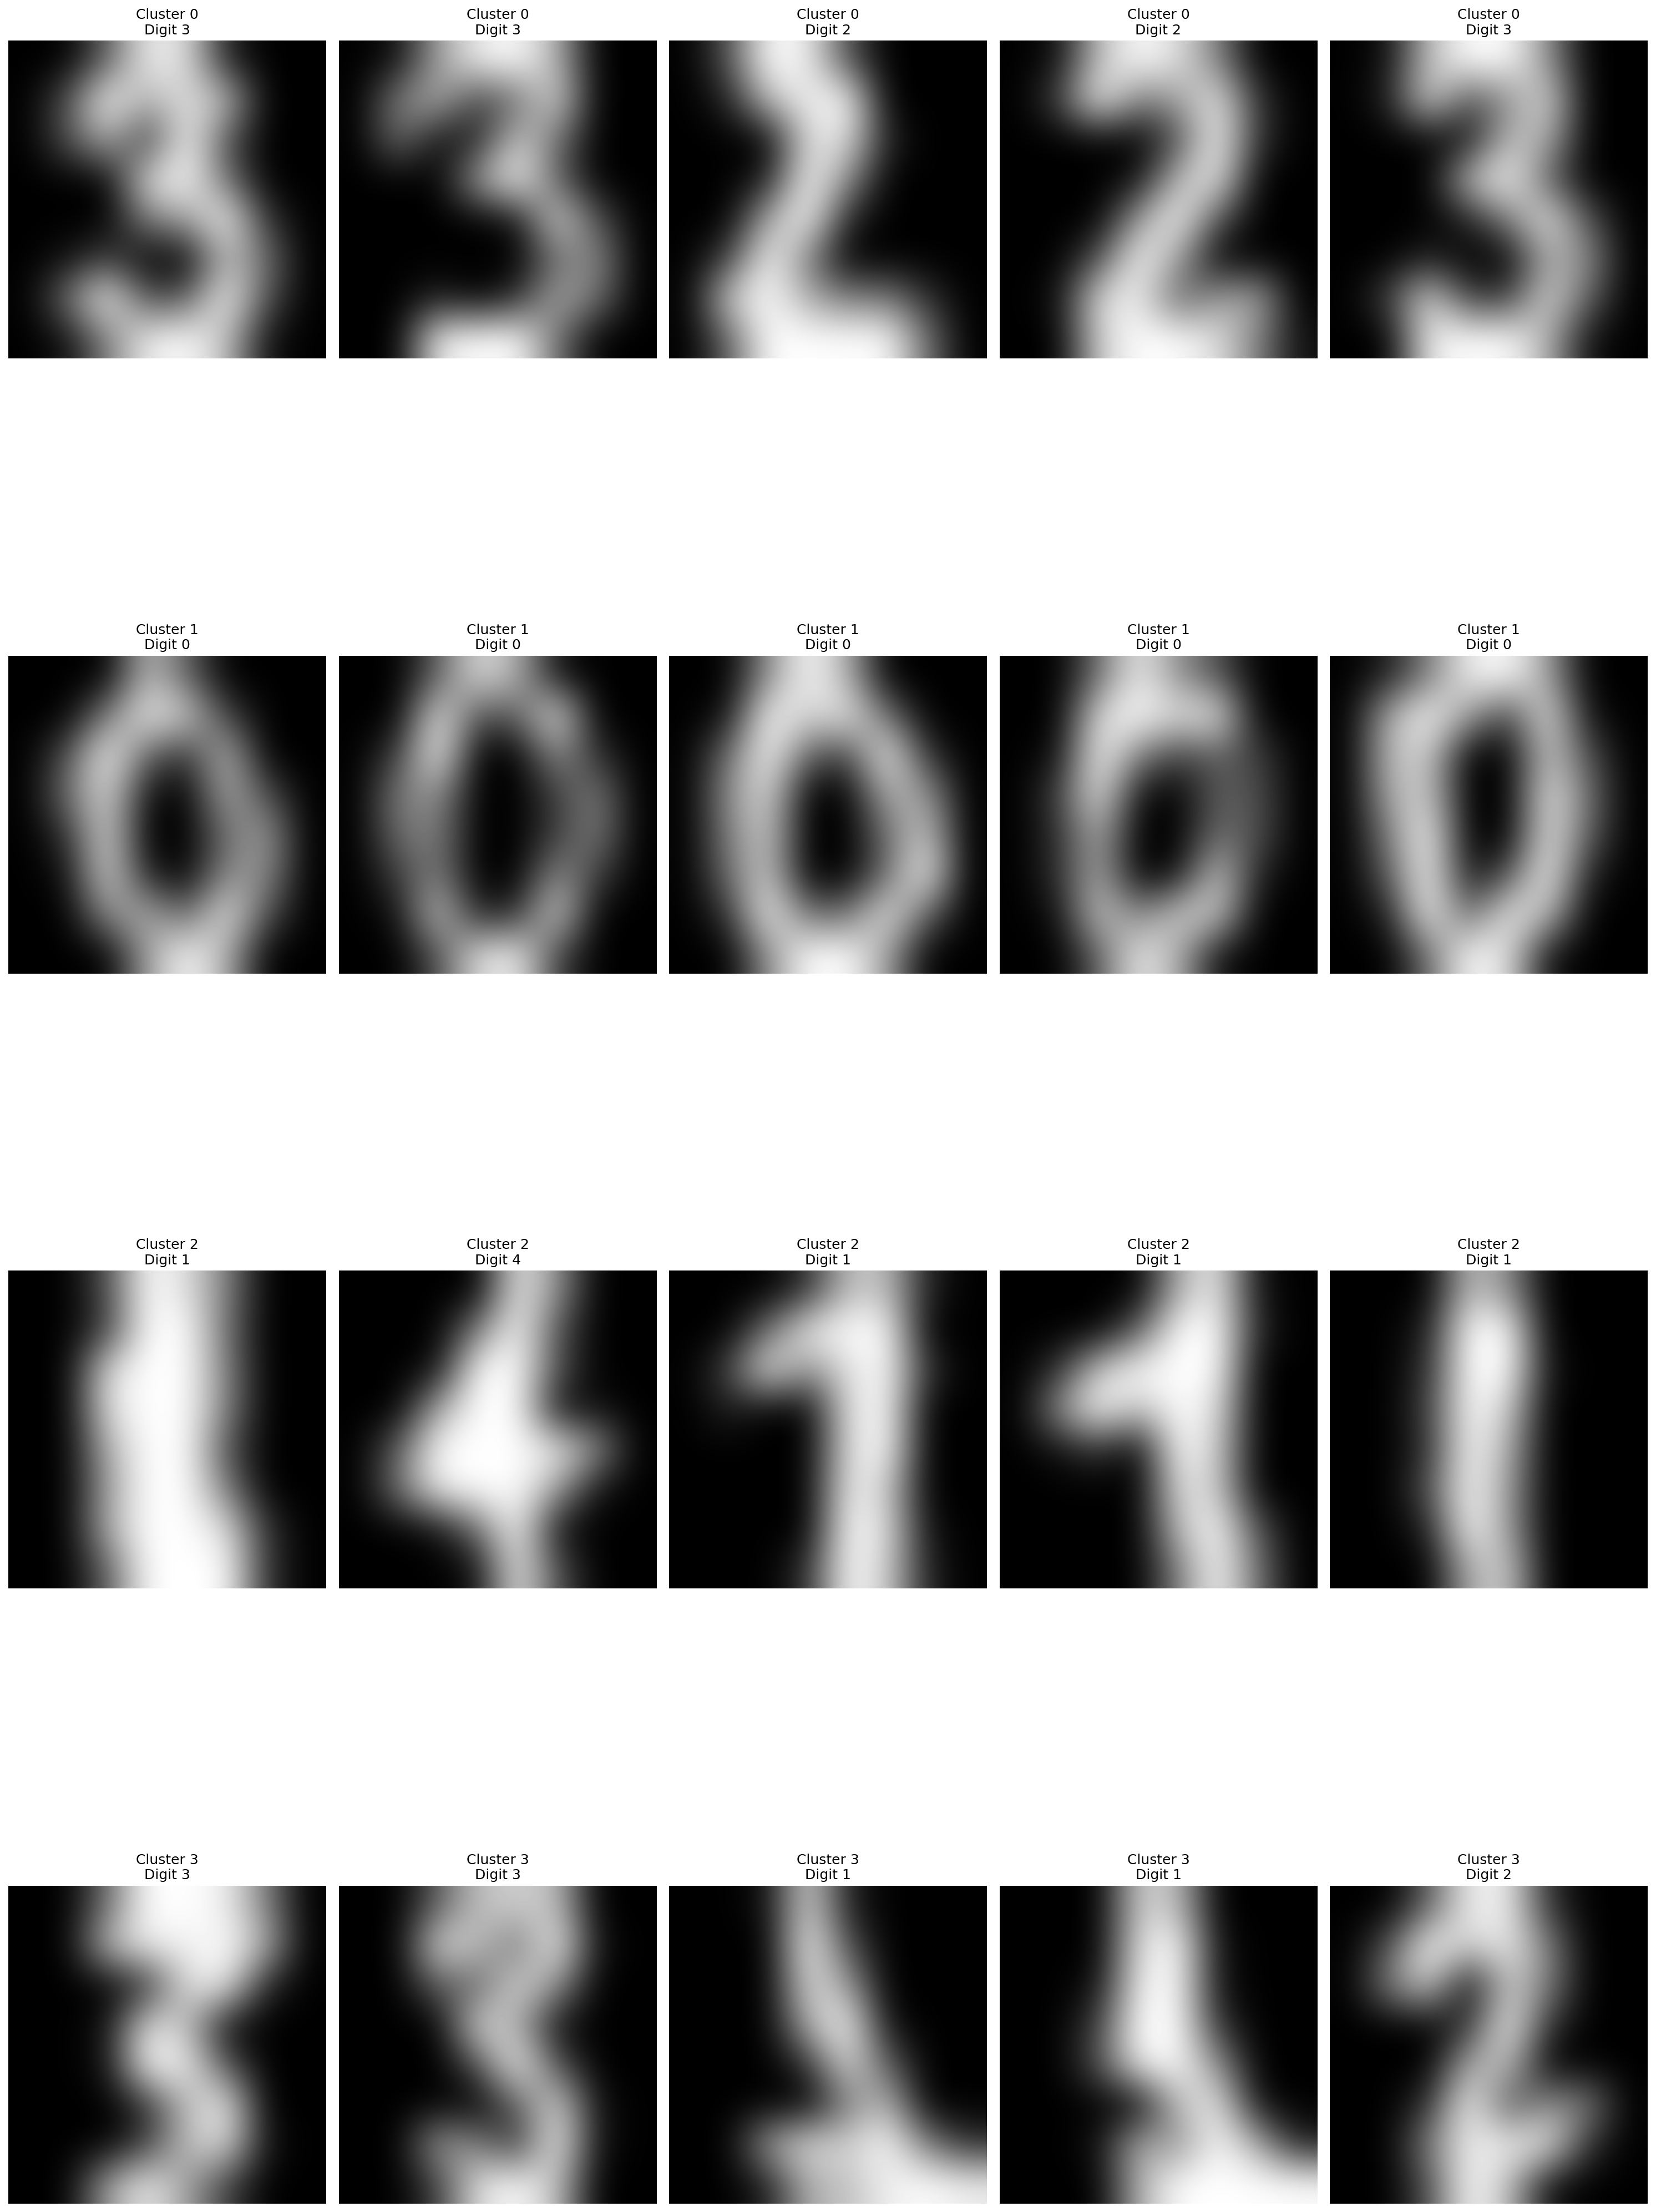

In [ ]:
# (a) Extract and display sample images from each cluster
plt.figure(figsize=(20, 8*optimal_k), dpi=150)  # Increase figure size and DPI for better resolution
n_samples = 5

for cluster in range(optimal_k):
    # Get indices of samples in this cluster
    cluster_indices = np.where(cluster_labels == cluster)[0]
    # Randomly select n_samples from this cluster
    sample_indices = np.random.choice(cluster_indices, min(n_samples, len(cluster_indices)), replace=False)

    for i, idx in enumerate(sample_indices):
        plt.subplot(optimal_k, n_samples, cluster * n_samples + i + 1)
        # Use interpolation to smooth the image
        plt.imshow(X[idx].reshape(8, 8), cmap='gray', interpolation='bicubic')  # Changed interpolation method
        plt.title(f'Cluster {cluster}\nDigit {y[idx]}', fontsize=12)  # Increase font size for readability
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# (c) Analyze cluster purity
# Apply K-Means clustering
import pandas as pd
# from collections import Counter
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)  # Fit the model

# Assign clusters manually
df = pd.DataFrame(X)  # Convert X to DataFrame if it's not
df['Actual_Label'] = y  # Add actual labels
df['Cluster'] = kmeans.labels_  # Assign clusters

# Count actual labels in each cluster
cluster_label_counts = df.groupby('Actual_Label')['Cluster'].value_counts().unstack(fill_value=0)

# Print output
for cluster, label_counts in cluster_label_counts.items():
    print(f"Cluster {cluster}: {label_counts}")


Cluster 0: Actual_Label
0      0
1     17
2    164
3    179
4      1
Name: 0, dtype: int64
Cluster 1: Actual_Label
0    176
1      0
2      1
3      0
4      0
Name: 1, dtype: int64
Cluster 2: Actual_Label
0      2
1     46
2      4
3      0
4    174
Name: 2, dtype: int64
Cluster 3: Actual_Label
0      0
1    119
2      8
3      4
4      6
Name: 3, dtype: int64


In [ ]:
# Initialize purity calculation
from sklearn.metrics import accuracy_score
import numpy as np

# Get total number of samples
N = len(df)

# Compute the sum of maximum counts per cluster
max_counts = cluster_label_counts.max(axis=0).sum()
print("max_counts are:", max_counts)
# Calculate purity
purity_score = max_counts / N
print(f'Purity Score: {purity_score:.4f}')

max_counts are: 648
Purity Score: 0.7192
